In [1]:
import pandas as pd
import numpy as np
import itertools

We import the output of modularity run for chi = 0.0 

In [2]:
chi_run = {}

with open('0-0_98765.txt', 'r') as f:
    for line in f:
        node, cluster = line.split()
        node = int(node)
        cluster = int(cluster)
        chi_run[node] = cluster

In [3]:
len(chi_run)

1832

We also read in the clustering for the entire hemibrain

In [4]:
df = pd.read_csv('hemibrain_preprocessed/preprocessed-v1.2/preprocessed_nodes.csv')

In [5]:
df

,id,0.75,0.05,0.1,0.25,0.5,1.0,0.0,instance,celltype,...,size,status,cropped,statusLabel,cellBodyFiber,somaRadius,somaLocation,inputRois,outputRois,roiInfo
0,200326126,1,1,1,1,1,1,1,CL141_L,CL141,...,827930581,Traced,False,Roughly traced,PDL20,251.0,"[3844, 14565, 15568]","['AVLP(R)', 'IB', 'ICL(R)', 'INP', 'LH(R)', 'M...","['AVLP(R)', 'ICL(R)', 'INP', 'LH(R)', 'MB(+ACA...","{'SNP(R)': {'pre': 17, 'post': 19, 'downstream..."
1,202916528,2,2,2,2,2,2,2,FS4C(FQ12)_C4_R,FS4C,...,235674230,Traced,False,Roughly traced,PDM03,301.0,"[20091, 12266, 12208]","['CX', 'FB', 'FB-column3', 'FBl1', 'FBl2', 'FB...","['CX', 'FB', 'FBl7', 'SMP(L)', 'SNP(L)']","{'SNP(L)': {'pre': 93, 'post': 35, 'downstream..."
2,203253072,3,2,3,3,3,3,2,FS4A(AB)(FQ12)_C3_R,FS4A,...,154283963,Traced,False,Roughly traced,PDM03,236.0,"[17809, 10233, 14208]","['AB(R)', 'CRE(-RUB)(L)', 'CRE(L)', 'CX', 'FB'...","['AB(R)', 'CX', 'FB', 'FB-column3', 'FBl1', 'F...","{'SNP(L)': {'pre': 52, 'post': 30, 'downstream..."
3,203253253,4,3,3,4,4,4,2,SMP505(PDM22)_L,SMP505,...,1763416504,Traced,False,Roughly traced,NaN,351.0,"[32168, 13757, 13336]","['ATL(L)', 'CRE(-RUB)(L)', 'CRE(L)', 'ICL(L)',...","['SIP(L)', 'SIP(R)', 'SLP(R)', 'SMP(L)', 'SMP(...","{'SNP(L)': {'pre': 150, 'post': 2282, 'downstr..."
4,203257652,5,2,3,2,2,2,2,FS4C(FQ12)_C6_R,FS4C,...,209983364,Traced,False,Roughly traced,PDM02,301.0,"[22758, 16749, 10240]","['CX', 'FB', 'FBl1', 'FBl2', 'FBl3', 'FBl4', '...","['SIP(L)', 'SMP(L)', 'SNP(L)']","{'SNP(L)': {'pre': 65, 'post': 36, 'downstream..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21734,7112579856,2322,1,1,157,1064,3243,1,LC20,LC20,...,462394896,Traced,False,Roughly traced,NaN,301.5,"[7883, 23524, 33072]","['LO(R)', 'OL(R)', 'PLP(R)', 'VLNP(R)']","['LO(R)', 'OL(R)', 'PLP(R)', 'VLNP(R)']","{'OL(R)': {'pre': 268, 'post': 594, 'downstrea..."
21735,7112615127,2670,9,19,46,226,3110,6,AVLP335_R,AVLP335,...,453081149,Traced,False,Roughly traced,AVL13,NaN,NaN,"['AVLP(R)', 'PVLP(R)', 'VLNP(R)']","['AVLP(R)', 'PVLP(R)', 'VLNP(R)']","{'VLNP(R)': {'pre': 362, 'post': 577, 'downstr..."
21736,7112617294,2386,9,19,46,226,3362,6,AVLP331_R,AVLP331,...,438751734,Traced,False,Roughly traced,AVL13,NaN,NaN,"['AVLP(R)', 'PVLP(R)', 'VLNP(R)']","['AVLP(R)', 'PVLP(R)', 'VLNP(R)']","{'VLNP(R)': {'pre': 285, 'post': 661, 'downstr..."
21737,7112622044,879,3,8,14,120,2836,3,LAL137(PVL05)_L,LAL137,...,1529252938,Traced,False,Roughly traced,NaN,NaN,NaN,"['CRE(-ROB,-RUB)(R)', 'CRE(-RUB)(L)', 'CRE(L)'...","['CRE(-ROB,-RUB)(R)', 'CRE(-RUB)(L)', 'CRE(L)'...","{'SNP(R)': {'pre': 304, 'post': 130, 'downstre..."


### Preprocessing the nodes to create cluster dicts

We create dictionaries of different clusterings for ease of processing

In [6]:
hemibrain_clusters = {}
resolutions = ['0.0', '0.05', '0.1', '0.25', '0.5', '0.75', '1.0']
for res in resolutions:
    hemibrain_clusters[res] = {}
for _, row in df.iterrows():
    node = row['id']
    for res in resolutions:
        hemibrain_clusters[res][node] = row[res]
    

In [7]:
for n in chi_run:
    for res in resolutions:
        assert  n in hemibrain_clusters[res]

In [8]:
hemibrain_clusters_filtered = {}
for res in resolutions:
    hemibrain_clusters_filtered[res] = {}
    for n in chi_run:
        hemibrain_clusters_filtered[res][n] = hemibrain_clusters[res][n]

In [9]:
for res in resolutions:
    print(len(hemibrain_clusters_filtered[res]))

1832
1832
1832
1832
1832
1832
1832


In [10]:
del hemibrain_clusters

### Cluster Similarity Analysis

In [11]:
import itertools

def cluster_similarity(cluster_1, cluster_2, mode='both', node_filter=None):
    """
    Calculate the similarity between two clusterings using either the Jaccard index, Rand index, or both.

    Parameters:
    cluster_1 (dict): A dictionary representing the first clustering where keys are nodes and values are cluster labels.
    cluster_2 (dict): A dictionary representing the second clustering where keys are nodes and values are cluster labels.
    mode (str): The similarity measure to use ('jaccard', 'rand', or 'both'). Defaults to 'both'.
    node_filter (set, optional): A set of nodes to include in the comparison. If None, all nodes are included.

    Returns:
    float or tuple: The Jaccard index, Rand index, or both depending on the selected mode.
    
    Raises:
    AssertionError: If the mode is not one of 'jaccard', 'rand', or 'both', or if the clusterings do not have the same nodes.
    """
    # Ensure the mode is one of the valid options
    assert mode in ['jaccard', 'rand', 'both'], "Not a valid mode, please choose 'jaccard', 'rand' or 'both'"
    # Ensure both clusterings have the same set of nodes
    assert set(cluster_1.keys()) == set(cluster_2.keys())
    nodes = set(cluster_1.keys())
    
    # Apply node filter if provided
    if node_filter is not None:
        filter_set = set(node_filter)
        nodes = nodes.intersection(filter_set)
    
    # Initialize counters for pair counts
    f_0_0 = 0  # pair in different clusters in both clusterings
    f_0_1 = 0  # pair in different clusters in cluster_1 and same in cluster_2
    f_1_0 = 0  # pair in same cluster in cluster_1 and different in cluster_2
    f_1_1 = 0  # pair in same clusters in both clusterings

    # Count the number of pairs in each category
    for n1, n2 in itertools.combinations(nodes, 2):
        if cluster_1[n1] == cluster_1[n2] and cluster_2[n1] == cluster_2[n2]:
            f_1_1 += 1
        elif cluster_1[n1] == cluster_1[n2] and cluster_2[n1] != cluster_2[n2]:
            f_1_0 += 1
        elif cluster_1[n1] != cluster_1[n2] and cluster_2[n1] == cluster_2[n2]:
            f_0_1 += 1
        else:
            f_0_0 += 1
    print(f_0_0 + f_1_0 + f_1_1 + f_0_1)
    # Calculate and return the similarity measure(s)
    if mode == 'jaccard':
        return f_1_1 / (f_1_1 + f_0_1 + f_1_0)
    if mode == 'rand':
        return (f_1_1 + f_0_0) / (f_1_1 + f_1_0 + f_0_1 + f_0_0)
    
    return f_1_1 / (f_1_1 + f_0_1 + f_1_0), (f_1_1 + f_0_0) / (f_1_1 + f_1_0 + f_0_1 + f_0_0)


In [21]:
import itertools

def cluster_similarity0(cluster_1, cluster_2, mode='both', node_filter=None):
    """
    Calculate the similarity between two clusterings using either the Jaccard index, Rand index, or both.

    Parameters:
    cluster_1 (dict): A dictionary representing the first clustering where keys are nodes and values are cluster labels.
    cluster_2 (dict): A dictionary representing the second clustering where keys are nodes and values are cluster labels.
    mode (str): The similarity measure to use ('jaccard', 'rand', or 'both'). Defaults to 'both'.
    node_filter (set, optional): A set of nodes to include in the comparison. If None, all nodes are included.

    Returns:
    float or tuple: The Jaccard index, Rand index, or both depending on the selected mode.
    
    Raises:
    AssertionError: If the mode is not one of 'jaccard', 'rand', or 'both', or if the clusterings do not have the same nodes.
    """
    # Ensure the mode is one of the valid options
    assert mode in ['jaccard', 'rand', 'both'], "Not a valid mode, please choose 'jaccard', 'rand' or 'both'"
    # Ensure both clusterings have the same set of nodes
    assert set(cluster_1.keys()) == set(cluster_2.keys())
    nodes = set(cluster_1.keys())
    
    # Apply node filter if provided
    if node_filter is not None:
        filter_set = set(node_filter)
        nodes = nodes.intersection(filter_set)
    
    # Initialize counters for pair counts
    f_0_0 = 0  # pair in different clusters in both clusterings
    f_0_1 = 0  # pair in different clusters in cluster_1 and same in cluster_2
    f_1_0 = 0  # pair in same cluster in cluster_1 and different in cluster_2
    f_1_1 = 0  # pair in same clusters in both clusterings

    # Count the number of pairs in each category
    for n1, n2 in itertools.combinations(nodes, 2):
        if cluster_1[n1] == cluster_1[n2] and cluster_2[n1] == cluster_2[n2]:
            f_1_1 += 1
        elif cluster_1[n1] == cluster_1[n2] and cluster_2[n1] != cluster_2[n2]:
            f_1_0 += 1
        elif cluster_1[n1] != cluster_1[n2] and cluster_2[n1] == cluster_2[n2]:
            f_0_1 += 1
        else:
            f_0_0 += 1
    #print(f_0_0 + f_1_0 + f_1_1 + f_0_1)
    # Calculate and return the similarity measure(s)
    if mode == 'jaccard':
        return f_1_1 / (f_1_1 + f_0_1 + f_1_0)
    if mode == 'rand':
        return (f_1_1 + f_0_0) / (f_1_1 + f_1_0 + f_0_1 + f_0_0)
    
    return f_0_0, f_0_1, f_1_0, f_1_1 #f_1_1 / (f_1_1 + f_0_1 + f_1_0), (f_1_1 + f_0_0) / (f_1_1 + f_1_0 + f_0_1 + f_0_0)


In [22]:
f00, f01, f10, f11 = cluster_similarity0(hemibrain_clusters_filtered['0.0'], chi_run)
f11/(f11 + f01 + f10)

0.17465190122957694

In [12]:
jaccard_index, rand_score = cluster_similarity(hemibrain_clusters_filtered['0.0'], chi_run)

1677196


In [13]:
hemibrain_clusters_filtered

{'0.0': {1003215282: 6,
  1005952640: 1,
  1006928515: 1,
  1007260806: 1,
  1008024276: 2,
  1008102479: 1,
  1008369339: 2,
  1008391068: 2,
  1008693605: 2,
  1008966615: 1,
  1008970563: 1,
  1009371535: 2,
  1009578838: 3,
  1010044978: 2,
  1010235132: 3,
  1010437434: 2,
  1011970102: 3,
  1013040388: 3,
  1013066710: 3,
  1013416147: 3,
  1013757060: 3,
  1013779115: 2,
  1014102651: 2,
  1014223948: 2,
  1014457195: 2,
  1014461486: 2,
  1014465452: 2,
  1014465588: 2,
  1014465666: 2,
  1014474192: 2,
  1014802430: 3,
  1015143077: 3,
  1015458774: 1,
  1015479949: 3,
  1017547830: 3,
  1020608279: 3,
  1035393986: 2,
  1036257907: 1,
  1036503560: 4,
  1036637830: 3,
  1036646944: 3,
  1036987921: 1,
  1037612992: 1,
  1039063931: 2,
  1039068185: 2,
  1039085109: 2,
  1039400642: 2,
  1039426238: 2,
  1039685005: 6,
  1039754434: 2,
  1041071176: 2,
  1041075688: 2,
  1041666949: 6,
  1042116109: 2,
  1042366365: 3,
  1042724993: 6,
  1044800536: 2,
  1044805646: 2,
  10449

In [14]:
import random

In [25]:
# Shuffle the values in the dictionary for random baseline
values = list(chi_run.values())
random.shuffle(values)
chi_run_random = dict(zip(chi_run.keys(), values))

f00, f01, f10, f11 = cluster_similarity0(chi_run, chi_run_random)
f11/(f11 + f01 + f10)

0.08066573003350265

In [26]:
(f00+ f11)/(f11 + f01 + f10 + f00)

0.7464041173482407

In [15]:
jac_indices = {}
rand_scores = {}
jac_indices_random = {}
rand_scores_random = {}

for res in resolutions:
    jaccard_index, rand_score = cluster_similarity(hemibrain_clusters_filtered[res], chi_run)
    print(jaccard_index, rand_score)
    jac_indices[res] = jaccard_index
    rand_scores[res] = rand_score

    # Shuffle the values in the dictionary for random baseline
    values = list(chi_run.values())
    random.shuffle(values)
    chi_run_random = dict(zip(chi_run.keys(), values))
    
    jaccard_index_random, rand_score_random = cluster_similarity(hemibrain_clusters_filtered[res], chi_run_random)
    jac_indices_random[res] = jaccard_index_random
    rand_scores_random[res] = rand_score_random


1677196
0.17465190122957694 0.5569176172611907
1677196
1677196
0.16763697666566627 0.5766749980324303
1677196
1677196
0.16430728416326748 0.5898070350752088
1677196
1677196
0.1775958560570173 0.7940145337813828
1677196
1677196
0.10671776113336817 0.8624042747538153
1677196
1677196
0.021753416146594606 0.8535502111858125
1677196
1677196
0.009658133984658732 0.8520471071955812
1677196


In [16]:
import matplotlib.pyplot as plt
plt.style.use('default')

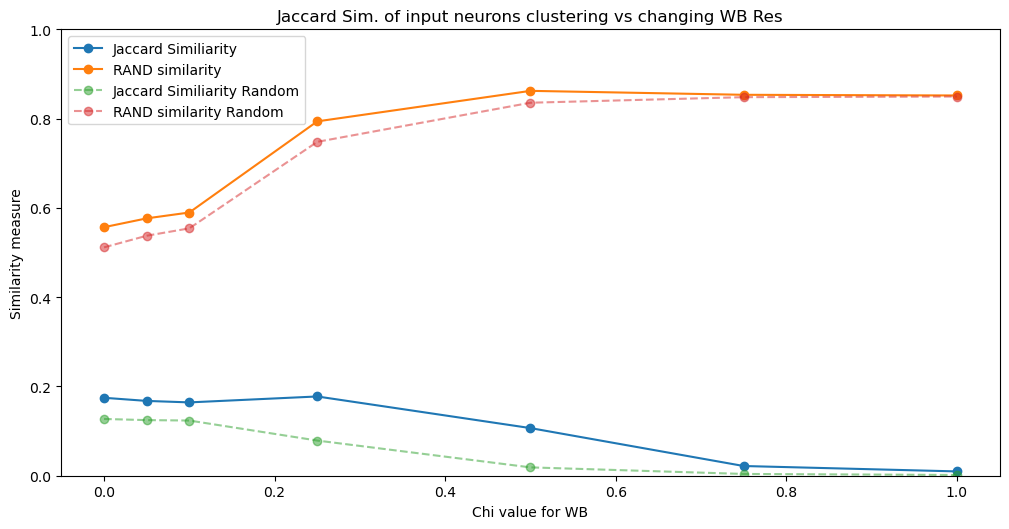

In [17]:
plt.figure(figsize=(10, 5))
plt.plot([float(res) for res in resolutions], [jac_indices[res] for res in resolutions], marker='o', label = 'Jaccard Similiarity')
plt.plot([float(res) for res in resolutions], [rand_scores[res] for res in resolutions], marker='o', label = 'RAND similarity')
plt.plot([float(res) for res in resolutions], [jac_indices_random[res] for res in resolutions], marker='o', label = 'Jaccard Similiarity Random', linestyle = '--', alpha = 0.5)
plt.plot([float(res) for res in resolutions], [rand_scores_random[res] for res in resolutions], marker='o', label = 'RAND similarity Random', linestyle = '--', alpha = 0.5)
plt.legend(loc='upper left')
plt.tight_layout()
plt.ylim(0, 1)
plt.xlabel('Chi value for WB')
plt.ylabel('Similarity measure')
plt.title('Jaccard Sim. of input neurons clustering vs changing WB Res')
plt.show()

### Cluster-wise breakdown
We conduct the similarity analysis for different clusters

In [41]:
cluster_nodes = {}
for i in range(1, 8):
    cluster_nodes[i] = [node for node in nodes if chi_run[node] == i]

In [42]:
for i in range(1, 8):
    print(len(cluster_nodes[i]))

309
199
319
347
217
210
231


In [46]:
cluster_jac_similarities = {}
cluster_rand_similarities = {}

cluster_jac_similarities_random = {}
cluster_rand_similarities_random = {}


In [47]:
for i in range(1, 8):
    cluster_jac_similarities[i] = {}
    cluster_rand_similarities[i] = {}
    cluster_jac_similarities_random[i] = {}
    cluster_rand_similarities_random[i] = {}
    for res in resolutions:
        cluster_jac_similarities[i][res], cluster_rand_similarities[i][res] = cluster_similarity(chi_run, hemibrain_clusters_filtered[res], node_filter=cluster_nodes[i])

        values = list(chi_run.values())
        random.shuffle(values)
        chi_run_random = dict(zip(chi_run.keys(), values))

        cluster_jac_similarities_random[i][res], cluster_rand_similarities_random[i][res] = cluster_similarity(chi_run_random, hemibrain_clusters_filtered[res], node_filter=cluster_nodes[i])
        
    

47586
47586
47586
47586
47586
47586
47586
47586
47586
47586
47586
47586
47586
47586
19701
19701
19701
19701
19701
19701
19701
19701
19701
19701
19701
19701
19701
19701
50721
50721
50721
50721
50721
50721
50721
50721
50721
50721
50721
50721
50721
50721
60031
60031
60031
60031
60031
60031
60031
60031
60031
60031
60031
60031
60031
60031
23436
23436
23436
23436
23436
23436
23436
23436
23436
23436
23436
23436
23436
23436
21945
21945
21945
21945
21945
21945
21945
21945
21945
21945
21945
21945
21945
21945
26565
26565
26565
26565
26565
26565
26565
26565
26565
26565
26565
26565
26565
26565


In [54]:
colours = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink']

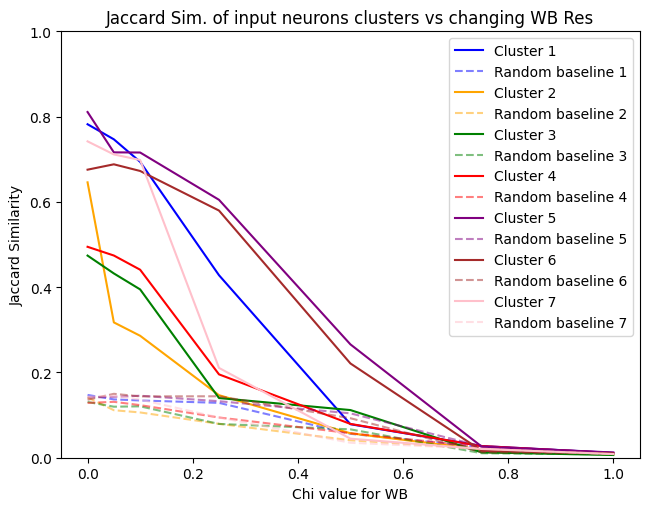

In [58]:
for i in range(1, 8):
    plt.plot([float(res) for res in resolutions],
             [cluster_jac_similarities[i][res] for res in resolutions],
             label = f'Cluster {i}',
             color = colours[i-1])
    plt.plot([float(res) for res in resolutions],
            [cluster_jac_similarities_random[i][res] for res in resolutions], 
            label = f'Random baseline {i}', linestyle = '--',
            color = colours[i-1], alpha = 0.5)
plt.legend()
plt.tight_layout()
plt.ylim(0, 1)
plt.xlabel('Chi value for WB')
plt.ylabel('Jaccard Similarity')
plt.title('Jaccard Sim. of input neurons clusters vs changing WB Res')
plt.show()